# Investment Analysis

#### Q. Spark Funds wants to make investments in a few companies. Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

<i> Data Source: crunchbase.com</i>

#### Goals:
- Investment type analysis
- Country analysis
- Sector analysis

## Checkpoint 1: Data Cleaning

Steps:
1. Import Necessary Libraries
2. Create DataFrames from the CSV files
3. Perform necessary analysis to answer questions mentioned in Investments.xlsx

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Load the companies and rounds data (provided on the previous page) into two data frames and 
#name them companies and rounds2 respectively.

rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1")

#### Understanding Data

Let us check the data in both the tables

In [3]:
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Have a look at metadata for both the tables

In [5]:
companies.info()
companies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


(66368, 10)

In [6]:
rounds2.info()
rounds2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


(114949, 6)

Check the amount of null values present to get a feel of how much cleaning would be required

In [7]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [8]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

After importing required libraries and importing the data into dataframes, let us now perform the analysis required to answer the questions in excel sheet

#### Q1. How many unique companies are present in rounds2?

In [9]:
#The total number of rows present in rounds2 dataframe
print(len(rounds2.index))

#Number of unique values of company (identified by company_permalink unique id) present in rounds2 dataframe
print(len(rounds2.company_permalink.apply(lambda x: x.lower()).drop_duplicates()))

114949
66370


#### Q2. How many unique companies are present in the companies file?

In [10]:
#The total number of rows present in companies dataframe
print(len(companies.index))

#Number of unique values of company (identified by permalink unique id) present in companies dataframe
print(len(companies.permalink.apply(lambda x: x.lower()).drop_duplicates()))

66368
66368


#### Q3. In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

A permalink or permanent link is a URL that is intended to remain unchanged for many years into the future, yielding a hyperlink that is less susceptible. Hence this is our unique key in this dataframe

#### Q4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

Looking at the answer obtained from Q2 and Q1, it can be deduced that rounds2 dataframe holds 2 exrta records than what is seen in companies dataframe which is a clear indicator that the answer for the above question is <b>'Yes'</b>

<i> Just out of curiosity: The following code finds the extra records that is present in rounds2 but not in companies dataframe

In [11]:
unique_rounds2 = rounds2.company_permalink.apply(lambda x: x.lower()).drop_duplicates()

In [12]:
print(len(unique_rounds2.loc[~unique_rounds2.isin(companies.permalink.apply(lambda x: x.lower()).drop_duplicates())].index),'values are present in rounds2 but not in companies dataframe')
print('_______________________________________________________________________________')
unique_rounds2.loc[~unique_rounds2.isin(companies.permalink.apply(lambda x: x.lower()).drop_duplicates())]

7 values are present in rounds2 but not in companies dataframe
_______________________________________________________________________________


29597                               /organization/e-cãbica
31863          /organization/energystone-games-çµç³æ¸¸æ
45176                  /organization/huizuche-com-æ ç§ÿè½¦
58473                /organization/magnet-tech-ç£ç³ç§æ
101036    /organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...
109969               /organization/weiche-tech-åè½¦ç§æ
113839                   /organization/zengame-ç¦
æ¸¸ç§æ
Name: company_permalink, dtype: object

#### Q5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [13]:
rounds2.rename(columns = {'company_permalink':'permalink'},inplace=True)
master_frame = pd.merge(companies, rounds2, how='inner', on='permalink')

Let us take a look at the merged data:

In [14]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


#### NO DATA!!!!

Let us have a closer look at the values present in permalink columns of both the data frames

In [15]:
print(companies.permalink)
print(rounds2.permalink)

0                                      /Organization/-Fame
1                                   /Organization/-Qounter
2                      /Organization/-The-One-Of-Them-Inc-
3                                    /Organization/0-6-Com
4                           /Organization/004-Technologies
                               ...                        
66363    /Organization/Zznode-Science-And-Technology-Co...
66364                            /Organization/Zzzzapp-Com
66365                                 /Organization/ÃEron
66366                               /Organization/ÃAsys-2
66367    /Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...
Name: permalink, Length: 66368, dtype: object
0                                       /organization/-fame
1                                    /ORGANIZATION/-QOUNTER
2                                    /organization/-qounter
3                       /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                                     /organization/0-6-com
     

There are 2 things noticable: 
1. The case of the strings present in 2 dataframes are not consistent
2. There are special characters like '/organization/ãeron' that are quite evident above

First lets fix the encoding issues:

Upon research found out that these special characters are noticed due to encoding issues. With reference provided in following link, I re encoded the data in UTF-8 format:
https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe

In [16]:
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.permalink = rounds2.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

Now let's convert all the characters of the string in that column to lower case

In [17]:
companies.permalink = companies.permalink.str.lower()
rounds2.permalink = rounds2.permalink.str.lower()

Let's perform the Merge one more time:

In [18]:
master_frame = pd.merge(companies, rounds2, how='inner', on='permalink')

In [19]:
master_frame.shape

(114949, 15)

In this new master_frame, <b>funding_round_permalink</b> will be the <b>Unique Key</b>. Let's write a code to check if there are any duplicate values in the master_frame:

In [20]:
len(master_frame.funding_round_permalink.str.lower().drop_duplicates().index)

114949

This length matches the shape of the master_frame indicating there are no duplicates in this master_frame

The shape of the df describes the observations present master_frame which is (114949,15)

Before we move on to the next check point, becuase we are interested in fund type, category_list and country based analysis, having null values in these columns will not help us with our analysis. Hence first look at the percentage of null values in these columns and get rid of the corresponding rows from the master_frame dataframe

In [21]:
print(master_frame.isnull().sum())

#Null values in percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Note that columns like funding_round_code with 70%+ null values and founded_at with 17%+ null values is of no use for us through out this analysis. Let's drop these columns:

In [22]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame.shape

(114949, 13)

Let's drop some more unwanted columns which are of no use to our analysis

In [23]:
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city',axis=1)

It is evident that country_code column has 8k+ rows owing to 7.55% of the records in the dataframe and category_list owes to just 2.97%. Let's go ahead and drop these rows where there is null against country code and category_list coulmn

In [24]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [25]:
master_frame = master_frame[~master_frame.category_list.isnull()]

Let's now revisit the null value percentage across all attributes:

In [26]:
print(master_frame.isnull().sum())

#Values in percentage:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                      0
name                           1
category_list                  0
status                         0
country_code                   0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          16003
dtype: int64


permalink                   0.00
name                        0.00
category_list               0.00
status                      0.00
country_code                0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          15.31
dtype: float64

It is evident now that because of deleting the null values there is a decrease of 2% of null values in rasied_amount_usd. Because we are interested in funds raised by these companies, if there is no details of funds raised amount, then no use having these rows. Hence let's check the stats to understand if data needs to be imputed or delete the rows where raised amount_usd is null.

In [27]:
master_frame.raised_amount_usd.describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

There is a huge difference between the 75th percentile and the max value in that calumn indicating the presence of outliers. If data needs to be imputed then we need to impute the median in place of null to fill the missing data but because there is close 15% data with null value, instead of calculating the median and imputing the values thereby exaggerating the data, we can go ahead and drop these rows as this represents less percentage of data.

In [28]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

Finally have a look at missing values:

In [29]:
#Values in percentage:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [30]:
master_frame.shape

(88529, 9)

In [31]:
#Let's export the merged data into a csv which can be used for future purposes if required
master_frame.to_csv("master_frame.csv", sep=',', index=False)

Now that we have answered all questions in 1st checkpoint and also performed data cleaning to the best of our knowledge, we go ahead with Checkpoint 2

##  Checkpoint 2: Funding Type Analysis

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

To find out the representative value let's first have a look at the distribution of data against different types of funding present in the dataset

In [32]:
print(master_frame.shape)
master_frame.funding_round_type.value_counts()

(88529, 9)


venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

Most of the investments are of Venture type.
<br/> Because we are interested in only 4 types of funding - venture, angel, seed, and private equity, let us take a subset of the masterframe pertaining to only these 4 funding type. 

In [33]:
sub_frame = master_frame[master_frame.funding_round_type.isin(['angel','seed','venture','private_equity'])]
sub_frame.reset_index(inplace=True,drop=True)

In [34]:
sub_frame.shape

(75124, 9)

The representative value can either be a mean or median. Let's look at both the values for these fund types:

In [35]:
pd.pivot_table(data=sub_frame, index='funding_round_type', values = 'raised_amount_usd',aggfunc=np.median)

,raised_amount_usd
funding_round_type,
angel,414906.0
private_equity,20000000.0
seed,300000.0
venture,5000000.0


In [36]:
round(pd.pivot_table(data=sub_frame, index='funding_round_type', values = 'raised_amount_usd',aggfunc=np.mean),2)

,raised_amount_usd
funding_round_type,
angel,971573.89
private_equity,73938486.28
seed,747793.68
venture,11724222.69


It is evident that there is quite a significant difference between mean and median. This usually occurs when there are significantly high amount of outliers.

Let's have a look at the distribution of 'raised_amount_usd' against 'funding_round_type' to understand the data distribution and see if there are any outliers by plotting a boxplot

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

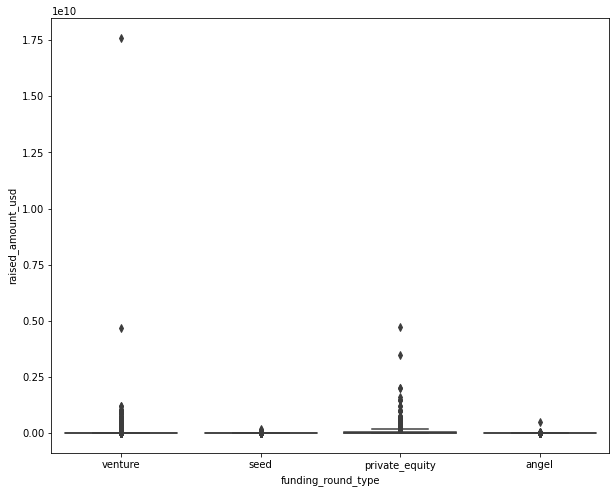

In [37]:
plt.figure(figsize=[10,8])
sns.boxplot(sub_frame['funding_round_type'],sub_frame['raised_amount_usd'])

Let's now remove the outliers to obtain a new sub set of the sub_frame and then plot the box plot to analyse further

In [38]:
sub_frame1 = sub_frame[sub_frame.raised_amount_usd < 1.3e+8]

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

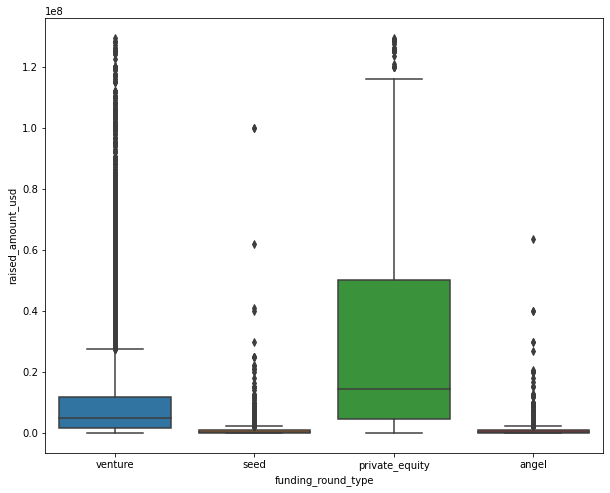

In [39]:
plt.figure(figsize=[10,8])
sns.boxplot(sub_frame1['funding_round_type'],sub_frame1['raised_amount_usd'])

From the above box plot and from the value_counts() performed in the beginning of the check point 2 section, it is evident that huge investors invest huge sums of amount in private equity but the number of such investors are less. Investors with significant amount of funds, invest in venture and the number of such investors is the highest from what we have in the dataset. As pointed out in the description of check point, angel and seed being only for startups do take that much of investment, but investors investing in these companies are more than those investing in Private equity but less than Venture.

Let's now take a mean of this new dataframe and analyse the stats:

In [40]:
round(pd.pivot_table(data=sub_frame1, index='funding_round_type', values = 'raised_amount_usd',aggfunc=np.mean),2)

,raised_amount_usd
funding_round_type,
angel,859380.12
private_equity,30449598.60
seed,732219.59
venture,9705920.18


The values against each fund type in this new sub_frame1 is still more than double the 50th percentile/median of the 4 fund types in the original sub_frame. Let's look at range of distribution by examining the 25th and the 75th percentile to conclude our analysis.

In [41]:
pd.pivot_table(data=sub_frame1, index='funding_round_type', values = 'raised_amount_usd',aggfunc=lambda x: np.quantile(x,0.25))

,raised_amount_usd
funding_round_type,
angel,152671.00
private_equity,4499995.25
seed,68794.00
venture,1600000.00


In [42]:
pd.pivot_table(data=sub_frame1, index='funding_round_type', values = 'raised_amount_usd',aggfunc=lambda x: np.quantile(x,0.75))

,raised_amount_usd
funding_round_type,
angel,1000000.0
private_equity,50000000.0
seed,1000000.0
venture,12000000.0


Analysis: From the above pivots it can be concluded that 
1. investors with funds between 68k to 1M invest in 'Seed' type
2. investors with funds between 152k to 1M invest in 'Angel' type
3. investors with funds between 1.6M to 12M invest in 'Venture' type 
4. The huge investors with 44m to 50M invest in 'Private Equity' type.

Knowing the range of the distribution of each fund type, I would choose the mean of the new sub_frame1 as the representative values for each of the subtype in question and it is as follows:
1. Angel - 859380.12
2. Private Equity - 30449598.60
3. Seed - 732219.59
4. Venture - 9705920.18

#### Q. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

From the above analysis, <b>'Venture'</b> investment type would be the most suitable for Spark Funds

In [43]:
rep_fund_type = round(pd.pivot_table(data=sub_frame1, index='funding_round_type', values = 'raised_amount_usd',aggfunc=np.mean),2)
rep_fund_type.reset_index().loc[(rep_fund_type.reset_index().raised_amount_usd>=5000000) & (rep_fund_type.reset_index().raised_amount_usd<=15000000)]

,funding_round_type,raised_amount_usd
3,venture,9705920.18


## Checkpoint 3: Country Analysis

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

Steps Involved:
1. Find out the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received) and then identify the top 3 officially english speaking countries among them 

Filter the dataframe to hold records for only 'Venture' funding type:

In [44]:
chosen_type = sub_frame1[sub_frame1.funding_round_type.isin(['venture'])]

In [45]:
chosen_type.shape

(47534, 9)

In [46]:
chosen_type.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
6,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


Lets reindex the new chosen_type dataframe

In [47]:
chosen_type.reset_index(inplace=True,drop=True)

In [48]:
chosen_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47534 entries, 0 to 47533
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47534 non-null  object 
 1   name                     47534 non-null  object 
 2   category_list            47534 non-null  object 
 3   status                   47534 non-null  object 
 4   country_code             47534 non-null  object 
 5   funding_round_permalink  47534 non-null  object 
 6   funding_round_type       47534 non-null  object 
 7   funded_at                47534 non-null  object 
 8   raised_amount_usd        47534 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.3+ MB


Let's write the code for finding out the top nine countries which have received the highest total funding across ALL sectors for the chosen investment type from chosen_type dataframe.

In [49]:
round((pd.pivot_table(data=chosen_type, index='country_code', values = 'raised_amount_usd',aggfunc=np.sum)/1000000),2).sort_values(by=('raised_amount_usd'),ascending = False).head(10)

,raised_amount_usd
country_code,
USA,348203.89
CHN,25142.92
GBR,18017.21
IND,10235.81
CAN,9317.22
ISR,6704.35
FRA,6370.33
DEU,6136.74
CHE,2801.56


Let's now store top 9 of the above into a new variable called top9

In [50]:
top9 = (pd.pivot_table(data=chosen_type, index='country_code', values = 'raised_amount_usd',aggfunc=np.sum)/1000000).sort_values(by=('raised_amount_usd'),ascending = False).head(9)

The above results are all for country codes and does not give us a clear picture of the actual coutry names for more clarity. For this reason, let's use the pycountry library of python. The following links were referred inorder to acheive this curious objective.
<br/> https://stackoverflow.com/questions/46195089/no-module-named-pycountry
<br/> https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python

pip install pycountry

In [51]:
import pycountry

input_countries = []
for index in top9.head(9).index:
    input_countries.append(index)

countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.name

c_names = [countries.get(country_code, 'Unknown code') for country_code in input_countries]

print('The Top 9 countries in descending order of sum total amount of investments are:',c_names)

The Top 9 countries in descending order of sum total amount of investments are: ['United States', 'China', 'United Kingdom', 'India', 'Canada', 'Israel', 'France', 'Germany', 'Switzerland']


Look up the following URL for these top 5 countries to find out if anyof them spean English as their official language:
<br/>https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

#### Q1. Identify the top three English-speaking countries in the data frame top9

From the above, the following observations have been made and analysed as English Speaking Countries officially:
1. United States - Yes
2. China - No
3. United Kingdom - Yes
4. India - Yes

We have our top 3 winners: <b>United States - USA, United Kingdom - GBR and India - IND.<b/>

## Checkpoint 4: Sector Analysis 1

Steps involved:
1. Extract the primary sector of each category list from the category_list column
2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

#### Understanding mapping.csv data

In [52]:
mapping = pd.read_csv("mapping.csv")

In [53]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [54]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [55]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [56]:
#Lets drop this 1 null value
mapping = mapping[~mapping.category_list.isnull()]
mapping.reset_index(inplace=True,drop=True)

In [57]:
#Cross verification
mapping.Blanks.sum()

0

In [58]:
mapping.shape

(687, 10)

In [59]:
#Lets understand if there are any duplicate values present in the mapping dataframe
len(mapping.category_list.unique())

687

The above code suggests that all 687 categories listed are unique and there are no duplicates. Lets now check if there are any categories/sectors in 'category_list' column of master_frame of chosen fund type

In [60]:
chosen_type[chosen_type.category_list.str.find('|')>=0]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
6,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0
13,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,/funding-round/645b4cd895450b8e0268027cd7813047,venture,04-11-2015,6602694.0
14,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,/funding-round/8025123b90c1ab687f9857ffe18bfd3b,venture,13-11-2013,1736910.0
15,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,/funding-round/b6c28ea4ebe32db7083052cf87e7c368,venture,25-10-2013,1800000.0
16,/organization/1001pharmacies-com,1001pharmacies.com,Cosmetics|Marketplaces,operating,FRA,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,09-07-2015,8900000.0
...,...,...,...,...,...,...,...,...,...
47518,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,/funding-round/5bebd7acdfd44138f81d162f21c532f9,venture,12-10-2010,6337786.0
47519,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,/funding-round/66d64809546fe2031d3479161e3c88f9,venture,01-01-2008,10000000.0
47520,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,/funding-round/72e4fdf2cfb0cdc0750f90e486722068,venture,18-07-2008,25000000.0
47521,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0


There are 9300 records in category_list which are seperated by '|'. Hence let's write a seperate code to split the category_list to find a primary_category.

In [61]:
chosen_type['primary_sector'] = chosen_type.category_list.str.split('|').str[0]

<ipython-input-61-b842c83dfb28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_type['primary_sector'] = chosen_type.category_list.str.split('|').str[0]


In [62]:
chosen_type.shape

(47534, 10)

Before merging, let's move on to mapping dataframe make sure that the data matches in both dataframes

In [63]:
mapping.category_list[~mapping.category_list.isin(chosen_type.primary_sector)]

15     Air Pollution Control
19       Alter0tive Medicine
21                  A0lytics
32               Aquaculture
58         Big Data A0lytics
               ...          
669       Virtual Workforces
671          Waste Ma0gement
681                 Weddings
682                Wholesale
685                    Women
Name: category_list, Length: 141, dtype: object

There can be 2 reasons for so many mismatches:
1. The case of the strings in 2 cloumns should be different
2. We also see that 'Alternative' is spelt as 'Aletr0tive', 'na' seems to be replaced with 0. We need to undo this. 

Let's first change the case of the column to upper to maintain uniformity

In [64]:
chosen_type.primary_sector = chosen_type.primary_sector.str.lower()
mapping.category_list = mapping.category_list.str.lower()

C:\Users\ashwi\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
mapping.category_list[~mapping.category_list.isin(chosen_type.primary_sector)]

15     air pollution control
19       alter0tive medicine
21                  a0lytics
32               aquaculture
58         big data a0lytics
               ...          
669       virtual workforces
671          waste ma0gement
681                 weddings
682                wholesale
685                    women
Name: category_list, Length: 141, dtype: object

Changing the case managed to reduce 1 cateegory. Let's move ahead to the next step to find out the records with 0 instead of 'na'

In [66]:
len(mapping[mapping.category_list.str.find('0')>=0])

53

In [67]:
mapping[mapping.category_list.str.find('0')>=0]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
19,alter0tive medicine,0,0,0,0,1,0,0,0,0
21,a0lytics,0,0,0,0,0,0,0,0,1
58,big data a0lytics,0,0,0,0,0,0,0,0,1
78,business a0lytics,0,0,0,0,0,0,0,0,1
88,can0bis,0,0,0,0,1,0,0,0,0
90,career ma0gement,0,0,0,0,0,0,0,0,1
102,chi0 internet,0,0,0,0,0,0,1,0,0
113,cloud ma0gement,0,0,0,0,0,0,1,0,0
144,contact ma0gement,0,0,0,0,0,0,0,0,1
197,digital rights ma0gement,0,0,0,1,0,0,0,0,0


Regular expression: https://docs.python.org/3/library/re.html

Let's now build a regex to specifically replace 0 with na and replace it:

In [68]:
mapping.category_list = mapping.category_list.str.replace(r'(?<=[a-zA-Z])*0(?=[\s*a-zA-Z])+','na')

In [69]:
mapping.category_list[~mapping.category_list.isin(chosen_type.primary_sector)]

15        air pollution control
32                  aquaculture
63     biomass power generation
68             boating industry
76              building owners
                 ...           
663                  veterinary
669          virtual workforces
681                    weddings
682                   wholesale
685                       women
Name: category_list, Length: 95, dtype: object

In [70]:
mapping[mapping.category_list.str.find('0')>=0]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
242,enterprise 2.0,0,0,0,0,0,0,0,1,0


Create a new column in mapping inorder to make the merge easier and simple

In [71]:
mapping['main_sector'] = mapping.iloc[:,1:].idxmax(axis = 1)

In [72]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,3d,0,0,0,0,0,1,0,0,0,Manufacturing
1,3d printing,0,0,0,0,0,1,0,0,0,Manufacturing
2,3d technology,0,0,0,0,0,1,0,0,0,Manufacturing
3,accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
4,active lifestyle,0,0,0,0,1,0,0,0,0,Health


In [73]:
sliced_mapping = mapping[['category_list','main_sector']]

In [74]:
sliced_mapping.rename(columns={'category_list':'primary_sector'}, inplace=True)

C:\Users\ashwi\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [75]:
chosen_type_sector = pd.merge(chosen_type, sliced_mapping, how='inner', on='primary_sector')

In [76]:
chosen_type_sector

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
47517,/organization/yapta,Yapta,Tracking|Transportation|Travel,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.0,tracking,Others
47518,/organization/yapta,Yapta,Tracking|Transportation|Travel,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.0,tracking,Others
47519,/organization/yunnan-landsun-green-industry-gr...,Yunnan Landsun Green Industry (Group),Tea,operating,CHN,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,01-07-2007,7227332.0,tea,Others
47520,/organization/ziftit,Ziftit,Gift Registries|Shopping,closed,USA,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.0,gift registries,Others


##  Checkpoint 5: Sector Analysis 2

Steps Involved:
1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. 
2. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

Let's start by creating 3 dataframes for 3 countries with funds raised between 5 and 15 million:
1. usa_venture_all_sector
2. gbr_venture_all_sector
3. ind_venture_all_sector

In [77]:
usa_venture_all_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['USA'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000)]
usa_venture_all_sector.reset_index(inplace=True,drop=True)

gbr_venture_all_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['GBR'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000)]
gbr_venture_all_sector.reset_index(inplace=True,drop=True)

ind_venture_all_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['IND'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000)]
ind_venture_all_sector.reset_index(inplace=True,drop=True)

In [78]:
print(usa_venture_all_sector.shape)
usa_venture_all_sector.head()

(12063, 11)


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment
1,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,media,Entertainment
2,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,media,Entertainment
3,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,media,Entertainment
4,/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,media,Entertainment


In [79]:
print(gbr_venture_all_sector.shape)
gbr_venture_all_sector.head()

(621, 11)


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
2,/organization/azimo,Azimo,Curated Web|Finance Technology|Financial Servi...,operating,GBR,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,11-03-2014,10000000.0,curated web,"News, Search and Messaging"
3,/organization/basekit-platform,BaseKit,Curated Web|Internet|Web Design,operating,GBR,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,13-05-2014,7000000.0,curated web,"News, Search and Messaging"
4,/organization/basekit-platform,BaseKit,Curated Web|Internet|Web Design,operating,GBR,/funding-round/9ceb098a822fb971db490b23c1067336,venture,03-02-2014,6818631.0,curated web,"News, Search and Messaging"


In [80]:
print(ind_venture_all_sector.shape)
ind_venture_all_sector.head()

(328, 11)


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
1,/organization/babajob,Babajob,Curated Web|Information Technology|Services|St...,operating,IND,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10000000.0,curated web,"News, Search and Messaging"
2,/organization/bharat-matrimony,Bharat Matrimony,Curated Web|Match-Making,operating,IND,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11750000.0,curated web,"News, Search and Messaging"
3,/organization/bluestone-com,Bluestone.com,Curated Web,operating,IND,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5000000.0,curated web,"News, Search and Messaging"
4,/organization/bluestone-com,Bluestone.com,Curated Web,operating,IND,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10000000.0,curated web,"News, Search and Messaging"


## United States:

#### Q1. Total number of Investments (count):

In [81]:
#Method 1:
usa_venture_all_sector.raised_amount_usd.count()

12063

In [82]:
#Method 2:
usa_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Total_Number_Of_Investments').sum()

Total_Number_Of_Investments    12063
dtype: int64

#### Q2. Total amount of investment (USD)

In [83]:
#Method 1: 
usa_venture_all_sector.raised_amount_usd.sum()

107757097294.0

In [84]:
#Method 2:
pd.pivot_table(data=usa_venture_all_sector, index='main_sector', values = 'raised_amount_usd',aggfunc=np.sum).sort_values(by = 'raised_amount_usd',ascending=False).rename(columns={'raised_amount_usd':'Total_Amount_Of_Investments'}).sum().map('{:,.2f}'.format)

Total_Amount_Of_Investments    107,757,097,294.00
dtype: object

#### Stats of 'Number Of Investments' against each 'Main Sector' 

The following questions will be answered by the dataframe generated below:
* <b>Q3. Top Sector name (no. of investment-wise)</b>
* <b>Q4. Second Sector name (no. of investment-wise)</b>
* <b>Q5. Third Sector name (no. of investment-wise)</b>
* <b>Q6. Number of investments in top sector (3)</b>
* <b>Q7. Number of investments in second sector (4)</b>
* <b>Q8. Number of investments in third sector (5)</b>

In [85]:
usa_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Number_Of_Investments').head(3)

,Number_Of_Investments
main_sector,
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350


Let's store the above result in a valriable for future use

In [86]:
top3_USA_count = usa_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Number_Of_Investments').head(3)

<i> NOTE: Out of curiosity, let's take a look at the sum of amount invested in each of these sectors </i>

In [87]:
top3_USA_amount = round(pd.pivot_table(data=usa_venture_all_sector, index='main_sector', values = 'raised_amount_usd',aggfunc=np.sum)/1000,2).sort_values(by = 'raised_amount_usd',ascending=False).rename(columns={'raised_amount_usd':'Amount_Of_Investments x10^3'}).head(3)
top3_USA_amount

,Amount_Of_Investments x10^3
main_sector,
Others,26321007.00
"Social, Finance, Analytics, Advertising",23807376.96
Cleantech / Semiconductors,21633430.82


#### Q9. For Q3 (top sector count-wise), which company received the highest investment?

Let's first slice the dataframe to contain only the top sector for the chosen country, fund type and fund range of 5-15 million USD and then find the highest investment against company in the sector,country and investment range

In [88]:
usa_venture_top1_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['USA'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_USA_count.index[0]]))]
usa_venture_top1_sector.reset_index(inplace=True, drop = True)

In [89]:
u1 = pd.pivot_table(data=usa_venture_top1_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
u1

,Highest_Investment
Company_Name,
Virtustream,64300000.0


#### Q10. For Q4 (second best sector count-wise), which company received the highest investment?

Let's do the same for 2nd top sector identified

In [90]:
usa_venture_top2_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['USA'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_USA_count.index[1]]))]
usa_venture_top2_sector.reset_index(inplace=True, drop = True)

In [91]:
u2 = pd.pivot_table(data=usa_venture_top2_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
u2

,Highest_Investment
Company_Name,
SST Inc. (Formerly ShotSpotter),67933006.0


<i> NOTE: Just for curiosity, let's also look at company with highest investment in the 3rd sector</i>

In [92]:
usa_venture_top3_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['USA'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_USA_count.index[2]]))]

usa_venture_top3_sector.reset_index(inplace=True, drop = True)

In [93]:
u3 = pd.pivot_table(data=usa_venture_top3_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
u3

,Highest_Investment
Company_Name,
Biodesix,75300000.0


## United Kingdom

#### Q1. Total number of Investments (count):

In [94]:
#Method 1:
gbr_venture_all_sector.raised_amount_usd.count()

621

In [95]:
#Method 2:
gbr_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Total_Number_Of_Investments').sum()

Total_Number_Of_Investments    621
dtype: int64

#### Q2. Total amount of investment (USD)

In [96]:
#Method 1: 
gbr_venture_all_sector.raised_amount_usd.sum()

5379078691.0

In [97]:
#Method 2:
pd.pivot_table(data=gbr_venture_all_sector, index='main_sector', values = 'raised_amount_usd',aggfunc=np.sum).sort_values(by = 'raised_amount_usd',ascending=False).rename(columns={'raised_amount_usd':'Total_Amount_Of_Investments'}).sum().map('{:,.2f}'.format)

Total_Amount_Of_Investments    5,379,078,691.00
dtype: object

#### Stats of 'Number Of Investments' against each 'Main Sector' 

The following questions will be answered by the dataframe generated below:
* <b>Q3. Top Sector name (no. of investment-wise)</b>
* <b>Q4. Second Sector name (no. of investment-wise)</b>
* <b>Q5. Third Sector name (no. of investment-wise)</b>
* <b>Q6. Number of investments in top sector (3)</b>
* <b>Q7. Number of investments in second sector (4)</b>
* <b>Q8. Number of investments in third sector (5)</b>

In [98]:
gbr_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Number_Of_Investments').head(3)

,Number_Of_Investments
main_sector,
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130


Let's store the above result in a valriable for future use

In [99]:
top3_gbr_count = gbr_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Number_Of_Investments').head(3)

<i> NOTE: Out of curiosity, let's take a look at the sum of amount invested in each of these sectors </i>

In [100]:
top3_gbr_amount = round(pd.pivot_table(data=gbr_venture_all_sector, index='main_sector', values = 'raised_amount_usd',aggfunc=np.sum)/1000,2).sort_values(by = 'raised_amount_usd',ascending=False).rename(columns={'raised_amount_usd':'Amount_Of_Investments'}).head(3)
top3_gbr_amount

,Amount_Of_Investments
main_sector,
Others,1283624.29
Cleantech / Semiconductors,1163990.06
"Social, Finance, Analytics, Advertising",1089404.01


#### Q9. For Q3 (top sector count-wise), which company received the highest investment?

In [101]:
gbr_venture_top1_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['GBR'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_gbr_count.index[0]]))]
gbr_venture_top1_sector.reset_index(inplace=True, drop = True)

In [102]:
g1 = pd.pivot_table(data=gbr_venture_top1_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
g1

,Highest_Investment
Company_Name,
Electric Cloud,37000000.0


#### Q10. For Q4 (second best sector count-wise), which company received the highest investment?

Let's do the same for 2nd top sector identified

In [103]:
gbr_venture_top2_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['GBR'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_gbr_count.index[1]]))]
gbr_venture_top2_sector.reset_index(inplace=True, drop = True)

In [104]:
g2 = pd.pivot_table(data=gbr_venture_top2_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
g2

,Highest_Investment
Company_Name,
Celltick Technologies,37500000.0


<i> NOTE: Just for curiosity, let's also look at company with highest investment in the 3rd sector</i>

In [105]:
gbr_venture_top3_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['GBR'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_gbr_count.index[2]]))]

gbr_venture_top3_sector.reset_index(inplace=True, drop = True)

In [106]:
g3 = pd.pivot_table(data=gbr_venture_top3_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
g3

,Highest_Investment
Company_Name,
EUSA Pharma,35600000.0


## India

#### Q1. Total number of Investments (count):

In [107]:
#Method 1:
ind_venture_all_sector.raised_amount_usd.count()

328

In [108]:
#Method 2:
ind_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Total_Number_Of_Investments').sum()

Total_Number_Of_Investments    328
dtype: int64

#### Q2. Total amount of investment (USD)

In [109]:
#Method 1: 
ind_venture_all_sector.raised_amount_usd.sum()

2949543602.0

In [110]:
#Method 2:
pd.pivot_table(data=ind_venture_all_sector, index='main_sector', values = 'raised_amount_usd',aggfunc=np.sum).sort_values(by = 'raised_amount_usd',ascending=False).rename(columns={'raised_amount_usd':'Total_Amount_Of_Investments'}).sum().map('{:,.2f}'.format)

Total_Amount_Of_Investments    2,949,543,602.00
dtype: object

#### Stats of 'Number Of Investments' against each 'Main Sector' 

The following questions will be answered by the dataframe generated below:
* <b>Q3. Top Sector name (no. of investment-wise)</b>
* <b>Q4. Second Sector name (no. of investment-wise)</b>
* <b>Q5. Third Sector name (no. of investment-wise)</b>
* <b>Q6. Number of investments in top sector (3)</b>
* <b>Q7. Number of investments in second sector (4)</b>
* <b>Q8. Number of investments in third sector (5)</b>

In [111]:
ind_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Number_Of_Investments').head(3)

,Number_Of_Investments
main_sector,
Others,110
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


Let's store the above result in a valriable for future use

In [112]:
top3_ind_count = ind_venture_all_sector.main_sector.value_counts().rename_axis('main_sector').to_frame(name='Number_Of_Investments').head(3)

<i> NOTE: Out of curiosity, let's take a look at the sum of amount invested in each of these sectors </i>

In [113]:
top3_ind_amount = round(pd.pivot_table(data=ind_venture_all_sector, index='main_sector', values = 'raised_amount_usd',aggfunc=np.sum)/1000,2).sort_values(by = 'raised_amount_usd',ascending=False).rename(columns={'raised_amount_usd':'Amount_Of_Investments'}).head(3)
top3_ind_amount

,Amount_Of_Investments
main_sector,
Others,1013409.51
"Social, Finance, Analytics, Advertising",550549.55
"News, Search and Messaging",433834.54


#### Q9. For Q3 (top sector count-wise), which company received the highest investment?

In [114]:
ind_venture_top1_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['IND'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_ind_count.index[0]]))]
ind_venture_top1_sector.reset_index(inplace=True, drop = True)

In [115]:
i1 = pd.pivot_table(data=ind_venture_top1_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
i1

,Highest_Investment
Company_Name,
FirstCry.com,39000000.0


#### Q10. For Q4 (second best sector count-wise), which company received the highest investment?

Let's do the same for 2nd top sector identified

In [116]:
ind_venture_top2_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['IND'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_ind_count.index[1]]))]
ind_venture_top2_sector.reset_index(inplace=True, drop = True)

In [117]:
i2 =pd.pivot_table(data=ind_venture_top2_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
i2

,Highest_Investment
Company_Name,
Manthan Systems,50700000.0


<i> NOTE: Just for curiosity, let's also look at company with highest investment in the 3rd sector</i>

In [118]:
ind_venture_top3_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['IND'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin([top3_ind_count.index[2]]))]

ind_venture_top3_sector.reset_index(inplace=True, drop = True)

In [119]:
i3 = pd.pivot_table(data=ind_venture_top3_sector, index='name', values = 'raised_amount_usd',aggfunc=np.sum).sort_values('raised_amount_usd',ascending=False).rename_axis('Company_Name').rename(columns={'raised_amount_usd':'Highest_Investment'}).head(1)
i3

,Highest_Investment
Company_Name,
GupShup,33000000.0


## Checkpoint 6: Plots

#### Q1. Plots showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In the first plot a pie chart if used to identify the frequency of data/records across various funding types. The second chart explains average amount of investment in each funding type there by providing us a clear picture of the representative amount.

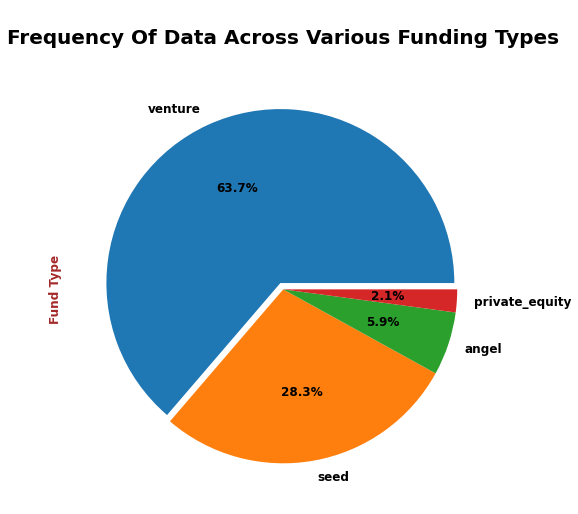

In [120]:
# Initialize the Figure Size
plt.figure(figsize=[15,8])

# Plot the Pie Chart
sub_frame1.funding_round_type.value_counts().plot.pie(explode=(0.04,0,0,0),autopct='%1.1f%%',textprops={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axes
plt.ylabel("Fund Type", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

# Adding and formatting title
plt.title("\nFrequency Of Data Across Various Funding Types\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.show()

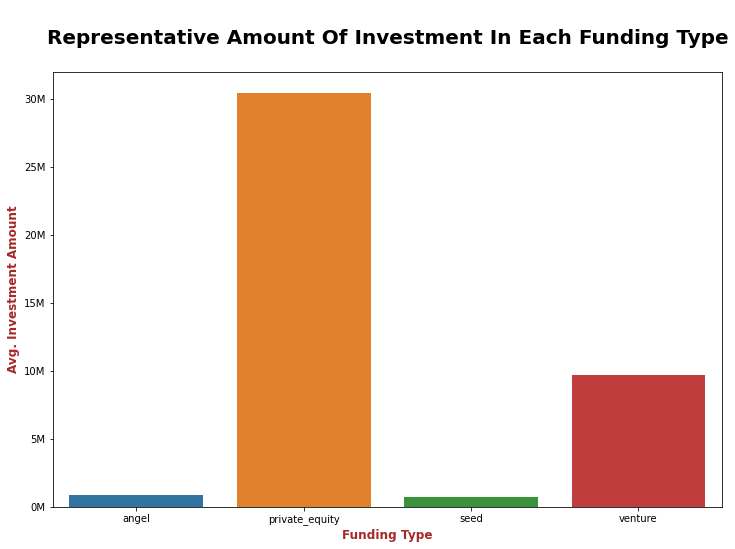

In [121]:
#Initialize Figure Size
plt.figure(figsize=[12,8])

#Prepare the data
data1 = round(pd.pivot_table(data=sub_frame1, index='funding_round_type', values = 'raised_amount_usd',aggfunc=np.mean),2)
data1.reset_index(inplace=True)

#Plot the graph
sns.barplot(data=data1, x="funding_round_type", y="raised_amount_usd")

# Adding and formatting title
plt.title("\nRepresentative Amount Of Investment In Each Funding Type\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Funding Type", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Avg. Investment Amount", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

# Modifying the ticks to show information in (million dollars)
ticks = np.arange(0, 35000000, 5000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

To re-iterate: From the above bar plot and pie chart, it is evident that huge investors invest huge sums of amount in private equity but the number of such investors are less. Investors with significant amount of funds, invest in venture and the number of such investors is the highest from what we have in the dataset. As pointed out in the description of check point, angel and seed being only for startups do take that much of investment, but investors investing in these companies are more than those investing in Private equity but less than Venture.Since we have to invest 5-15 M, clearly 'Venture' is our desired Fund Type.

#### Q2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

The bolow bar graph is used to acieve the distribution of total investment amount against top 9 countries across all sectors

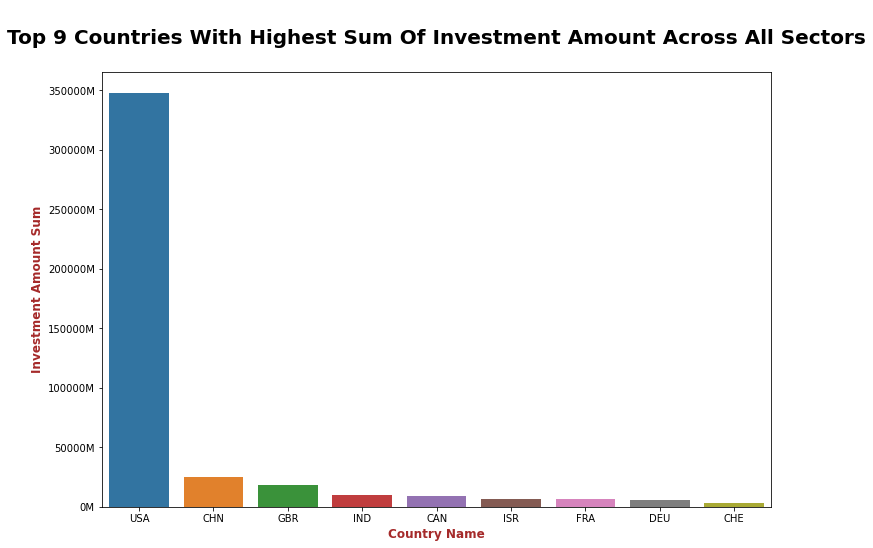

In [122]:
#Initialize figure size
plt.figure(figsize=[12,8])

#Prepare data
top9.reset_index(inplace=True)

#Plot Graph
sns.barplot(data=top9, x="country_code", y="raised_amount_usd")

# Adding and formatting title
plt.title("\nTop 9 Countries With Highest Sum Of Investment Amount Across All Sectors\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Country Name", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Investment Amount Sum", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

# Modifying the ticks to show information in (million dollars)
ticks = np.arange(0, 400000, 50000)
labels = ["{}M".format(i) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

Clearly, USA, GBR and IND are the top 3 english speaking countries among the above 9

#### Q3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

Create 3 seperate dataframes for 3 countries across top 3 sectors with funds raised between 5M and 15M USD for 'Venture' fund type. Then concatenate them to for 1 master dataframe called 'top3_country_venture_top3_sector'. Plot graph against this new dataframe to obtain expected result

In [123]:
#DF for USA with Funds raised between 5 and 15M USD, copanies belonging to venture tupe and has data across top 3 sectors identified by count of records
usa_venture_all3_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['USA'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin(list(top3_USA_count.index)))]

#DF for GBR with Funds raised between 5 and 15M USD, copanies belonging to venture tupe and has data across top 3 sectors identified by count of records
gbr_venture_all3_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['GBR'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin(list(top3_gbr_count.index)))]

#DF for IND with Funds raised between 5 and 15M USD, copanies belonging to venture tupe and has data across top 3 sectors identified by count of records
ind_venture_all3_sector = chosen_type_sector[(chosen_type_sector.country_code.isin(['IND'])) & (chosen_type_sector.raised_amount_usd>=5000000) & (chosen_type_sector.raised_amount_usd<=15000000) & (chosen_type_sector.main_sector.isin(list(top3_ind_count.index)))]

#Concatenate the 3 dataframes to obtain a master dataframe
top3_country_venture_top3_sector = pd.concat([usa_venture_all3_sector,gbr_venture_all3_sector,ind_venture_all3_sector])
top3_country_venture_top3_sector.reset_index(inplace=True, drop = True)

#Prepare the dataframe so that the same can be directly used for plotting
top3_country_venture_top3_sector.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count']).sort_values(by=['count','country_code','main_sector'],ascending=False)

count
country_code main_sector                                   
USA          Others                                    2950
             Social, Finance, Analytics, Advertising   2714
             Cleantech / Semiconductors                2350
GBR          Others                                     147
             Social, Finance, Analytics, Advertising    133
             Cleantech / Semiconductors                 130
IND          Others                                     110
             Social, Finance, Analytics, Advertising     60
             News, Search and Messaging                  52

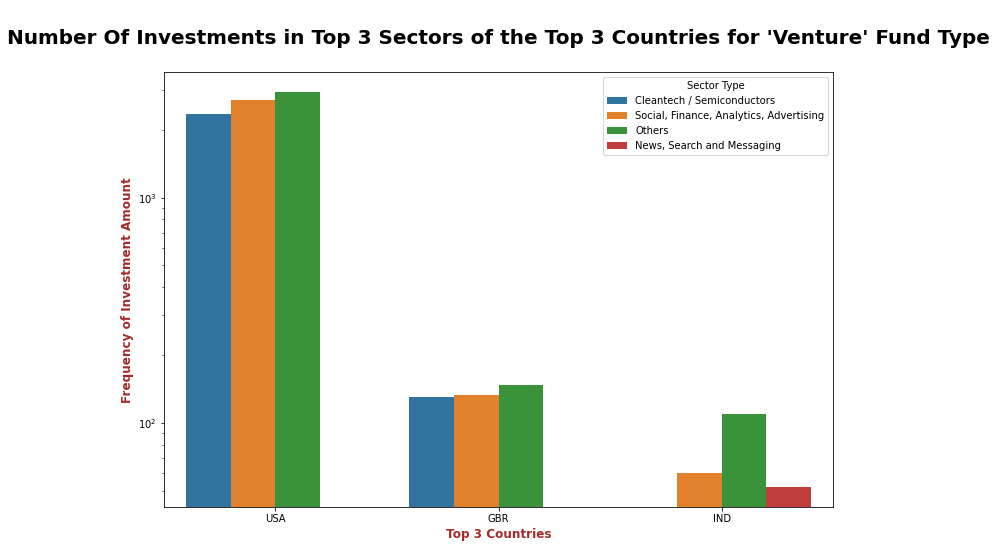

In [124]:
#Initialize the figure size
plt.figure(figsize=[12,8])

#Plot the graph and store the axes return value in ax variable
ax = sns.barplot(data = top3_country_venture_top3_sector, x='country_code',y='raised_amount_usd',estimator= np.size,hue='main_sector')

# Adding and formatting title
plt.title("\nNumber Of Investments in Top 3 Sectors of the Top 3 Countries for 'Venture' Fund Type\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Top 3 Countries", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Frequency of Investment Amount", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
ax.figure.get_axes()[0].set_yscale('log')

# Rename Hue title from main_sector to Sector Type
ax.legend().set_title('Sector Type')

plt.show()

## Final Recommendation:

Let's first create dataframe for each country consisting of country code, top 3 sectors shortlisted per country based on number of investments per sector and company name with highest investment per each shortlisted sector. Then we will concatenate these 3 dataframes per country to provide our final recommendation. Note that all these data shortlisted is only for fund type 'Venture'.

In [125]:
#dataframe for USA
u1.reset_index(inplace=True)
u1['country_code']=usa_venture_top1_sector.country_code.head(1)[0]
u1['main_sector']=usa_venture_top1_sector.main_sector.head(1)[0]
u2.reset_index(inplace=True)
u2['country_code']=usa_venture_top2_sector.country_code.head(1)[0]
u2['main_sector']=usa_venture_top2_sector.main_sector.head(1)[0]
u3.reset_index(inplace=True)
u3['country_code']=usa_venture_top3_sector.country_code.head(1)[0]
u3['main_sector']=usa_venture_top3_sector.main_sector.head(1)[0]
usa_recommendation = pd.concat([u1,u2,u3])
usa_recommendation.reset_index(inplace=True, drop = True)
usa_recommendation

#dataframe for gbr
g1.reset_index(inplace=True)
g1['country_code']=gbr_venture_top1_sector.country_code.head(1)[0]
g1['main_sector']=gbr_venture_top1_sector.main_sector.head(1)[0]
g2.reset_index(inplace=True)
g2['country_code']=gbr_venture_top2_sector.country_code.head(1)[0]
g2['main_sector']=gbr_venture_top2_sector.main_sector.head(1)[0]
g3.reset_index(inplace=True)
g3['country_code']=gbr_venture_top3_sector.country_code.head(1)[0]
g3['main_sector']=gbr_venture_top3_sector.main_sector.head(1)[0]
gbr_recommendation = pd.concat([g1,g2,g3])
gbr_recommendation.reset_index(inplace=True, drop = True)
gbr_recommendation

#dataframe for ind
i1.reset_index(inplace=True)
i1['country_code']=ind_venture_top1_sector.country_code.head(1)[0]
i1['main_sector']=ind_venture_top1_sector.main_sector.head(1)[0]
i2.reset_index(inplace=True)
i2['country_code']=ind_venture_top2_sector.country_code.head(1)[0]
i2['main_sector']=ind_venture_top2_sector.main_sector.head(1)[0]
i3.reset_index(inplace=True)
i3['country_code']=ind_venture_top3_sector.country_code.head(1)[0]
i3['main_sector']=ind_venture_top3_sector.main_sector.head(1)[0]
ind_recommendation = pd.concat([i1,i2,i3])
ind_recommendation.reset_index(inplace=True, drop = True)
ind_recommendation

#concat all 3 dataframes created above to form a final recommendation dataframe 
final_company_recommendation = pd.concat([usa_recommendation,gbr_recommendation,ind_recommendation])
final_company_recommendation.reset_index(inplace=True, drop = True)

In [126]:
final_company_recommendation.groupby(['country_code', 'main_sector','Company_Name']).Highest_Investment.agg(['max']).rename(columns={'max':'Investment_Sum_In_All_Rounds'}).sort_values(by=['country_code','Investment_Sum_In_All_Rounds','main_sector'],ascending=False)

Investment_Sum_In_All_Rounds
country_code main_sector                             Company_Name                                                 
USA          Cleantech / Semiconductors              Biodesix                                           75300000.0
             Social, Finance, Analytics, Advertising SST Inc. (Formerly ShotSpotter)                    67933006.0
             Others                                  Virtustream                                        64300000.0
IND          Social, Finance, Analytics, Advertising Manthan Systems                                    50700000.0
             Others                                  FirstCry.com                                       39000000.0
             News, Search and Messaging              GupShup                                            33000000.0
GBR          Social, Finance, Analytics, Advertising Celltick Technologies                              37500000.0
             Others                                  Electric Cloud                                     37000000.0
             Cleantech / Semiconductors              EUSA Pharma                                        35600000.0

Let us plot a graph to visualize the above table

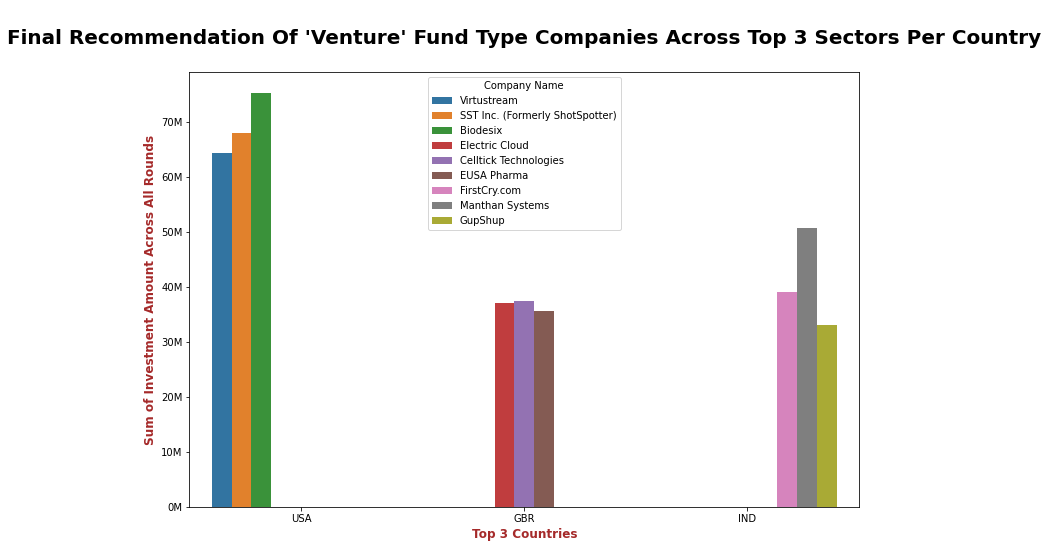

In [127]:
#Initialize the figure size
plt.figure(figsize=[12,8])

#Plot the graph and store the axes return value in ax variable
ax = sns.barplot(data = final_company_recommendation, x='country_code',y='Highest_Investment',estimator= np.max,hue='Company_Name')

# Adding and formatting title
plt.title("\nFinal Recommendation Of 'Venture' Fund Type Companies Across Top 3 Sectors Per Country\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Top 3 Countries", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Sum of Investment Amount Across All Rounds", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
#ax.figure.get_axes()[0].set_yscale('log')

# Modifying the ticks to show information in (million dollars)
ticks = np.arange(0, 80000000, 10000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
#plt.xticks(rotation=90)

# Rename Hue title from main_sector to Sector Type
ax.legend().set_title('Company Name')
#plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

The End :)